In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import plotly.offline as pyo

In [84]:
df = pd.read_csv('master_df.csv')
df.round(2)

,Unnamed: 0,[0-0],[1-0],[0-1],[2-0],[1-1],[0-2],[3-0],[2-1],[1-2],[3-1],[2-2],[3-2],OUT,WALK,PLAY
0,[0-0],0.0,0.38,0.51,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11
1,[1-0],0.0,0.00,0.00,0.34,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16
2,[0-1],0.0,0.00,0.00,0.00,0.4,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17
3,[2-0],0.0,0.00,0.00,0.00,0.0,0.00,0.31,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.17
4,[1-1],0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.34,0.46,0.00,0.00,0.00,0.00,0.00,0.20
5,[0-2],0.0,0.00,0.00,0.00,0.0,0.19,0.00,0.00,0.45,0.00,0.00,0.00,0.18,0.00,0.18
6,[3-0],0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.33,0.05
7,[2-1],0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.29,0.49,0.00,0.00,0.00,0.22
8,[1-2],0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.22,0.00,0.38,0.00,0.19,0.00,0.21
9,[3-1],0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.51,0.00,0.27,0.22


In [37]:
G = nx.DiGraph()

# Define edges between nodes that reflect state transition matrix
elist = [(1,2),(1,3),(2,4),(2,5),(3,5),(3,6),(4,7),(4,8),(5,8),(5,9),(6,6),(6,9),\
        (6,13),(7,10),(7,14),(8,10),(8,11),(9,9),(9,11),(9,13),(10,12),(10,14),\
        (11,11),(11,12),(11,13),(12,12),(12,13),(12,14)]

labels = ['0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%',\
          '0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%','0%']

In [83]:
len(elist)

28

In [38]:
G.add_edges_from(elist)
label_mapping = {1:'[0,0]',2:'[1,0]',3:'[0,1]',4:'[2,0]',5:'[1,1]',6:'[0,2]',\
                 7:'[3,0]',8:'[2,1]',9:'[1,2]',10:'[3,1]',11:'[2,2]',12:'[3,2]',\
                    13:'OUT',14:'WALK'}
G = nx.relabel_nodes(G, label_mapping)

In [64]:
G.edges['[0,0]','[0,1]']['color'] = 'red'
G.edges['[0,0]','[0,1]']

{'color': 'red'}

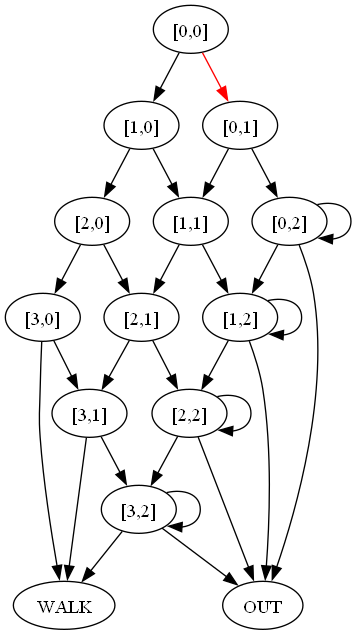

In [65]:
pydot_graph = nx.nx_pydot.to_pydot(G)

# Here we use the 'dot' layout engine, which is suitable for hierarchical graphs
pydot_graph.set_prog('dot')

# You can optionally set Graphviz attributes to style the graph
pydot_graph.set_node_defaults(shape='circle', style='filled', fillcolor='lightgrey', fontsize=10)
pydot_graph.set_edge_defaults(color='blue', arrowhead='vee')

# Save the pydot graph to a file
output_path = 'tiered_graph.png'
pydot_graph.write_png(output_path)

# If you're in a Jupyter notebook, you can display the graph
from IPython.display import Image
Image(output_path)

In [40]:
# Manually set positions of nodes
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

In [41]:
# Create edge trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line = dict(width=2, color='black'),
    hoverinfo='none',
    mode='lines')

edge_annotations = []

In [77]:
G['[0,0]']['[0,1]']['weight'] = 5

In [79]:
G.add_edge('[0,0]','[0,1]', weight=3)

In [81]:
G['[0,0]']

AtlasView({'[1,0]': {}, '[0,1]': {'color': 'red', 'weight': 3}})

In [82]:
# Add edges to edge Trace
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

    # Edge annotations (midpoint for label placement)
    edge_annotations.append(
        dict(
            x=(x0+x1)/2,
            y=(y0+y1)/2,
            xref='x',
            yref='y',
            text = str(G.edges[edge]['label']),
            showarrow=False,
            font=dict(color='black', size=10)
        )
    )

KeyError: 'label'

In [50]:
x = dict(x=(x0+x1)/2, y=(y0+y1)/2)

In [51]:
x

{'x': 120.61000000000001, 'y': 414.0}